# Assignment 18 - kNN classification of habitable planets


## Authors
B.W. Holwerda

## Learning Goals
* introduction to k Nearest Neighbor classification
* split data into training and test samples
* feature and label
* visualizing the classifications and evaluation
* whitening or scaling the data.

## Keywords
python, syntax, jupyter notebook, matplotlib, scatter, kNN classification, scaling, whitening

## Companion Content

## Summary
This assignment teaches how to apply the kNN classification (taking a group of neighbors and classify based on the majority). 

<hr>

## Student Name and ID:



## Date:

<hr>

In [29]:
import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 



import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
from io import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [31]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

### Read in data from file

In [32]:
LearningSet = pd.read_csv('HPLearningSet.csv')
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [33]:
#The new structure is called a data frame. 

LearningSet.head() #Visualizes the first 5 rows

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0


### Let's pick the same train/test set we had in the exercise

In [34]:
TrainSet =  LearningSet.iloc[:13,:] #.iloc is used to slice data frames using positional indexes

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and label

In [35]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)

In [36]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

### Exercise 1 

what are the features the classification will be based on? 
What is the label that is classified? 

*student work here*

### We are now ready to introduce the kNN (k Nearest Neighbor) algorithm.

It's a simple algorithm based on the idea of distance: we look for the k (an integer) objects that are closest to the one we would like to classify, and take the majority vote among the k classes of the k neighbors.

If you are wondering: what is even there to fit?

I had the same question, and found some solace in [this post](https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier).

In [37]:
from sklearn import neighbors

In [38]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [39]:
model

KNeighborsClassifier(n_neighbors=3)

For visualization purposes, let's use only the first two features.

In [40]:
Xtrain.iloc[:,:2] 

,S_MASS,P_PERIOD
0,0.86,3.601472
1,0.85,16.080661
2,1.19,7.638460
3,0.61,112.305300
4,0.98,12.992073
5,0.09,4.910000
6,0.69,4.655411
7,0.12,6.689000
8,1.12,1103.000000
9,0.81,168.811170


#### Fit and predict labels for test set

In [41]:
model.fit(Xtrain.iloc[:,:2],ytrain).predict(Xtest.iloc[:,:2]) 

array([1, 0, 1, 0, 1])

#### Calculate accuracy!

In [14]:
metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2]))

0.8

### Exercise 2 

what are the features the classification will be based on? 
What is the label that is classified? 

*student work here*

#### After fitting and predicting, we can access the k neighbors like this:

In [15]:
model.kneighbors(Xtest.iloc[:,:2]) #the first element gives the distances, the second the index

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]]))

In [16]:
#I can use the largest distances in my plot to make the circles - every point inside the circle is a neighbor!

for i in range(len(TestSet)): #plot neighbors
    
    print(model.kneighbors(Xtest.iloc[:,:2])[0][i,2])

39.726004816302904
5.766535965914376
47.2569051246575
3.5579225
32.05672308015779


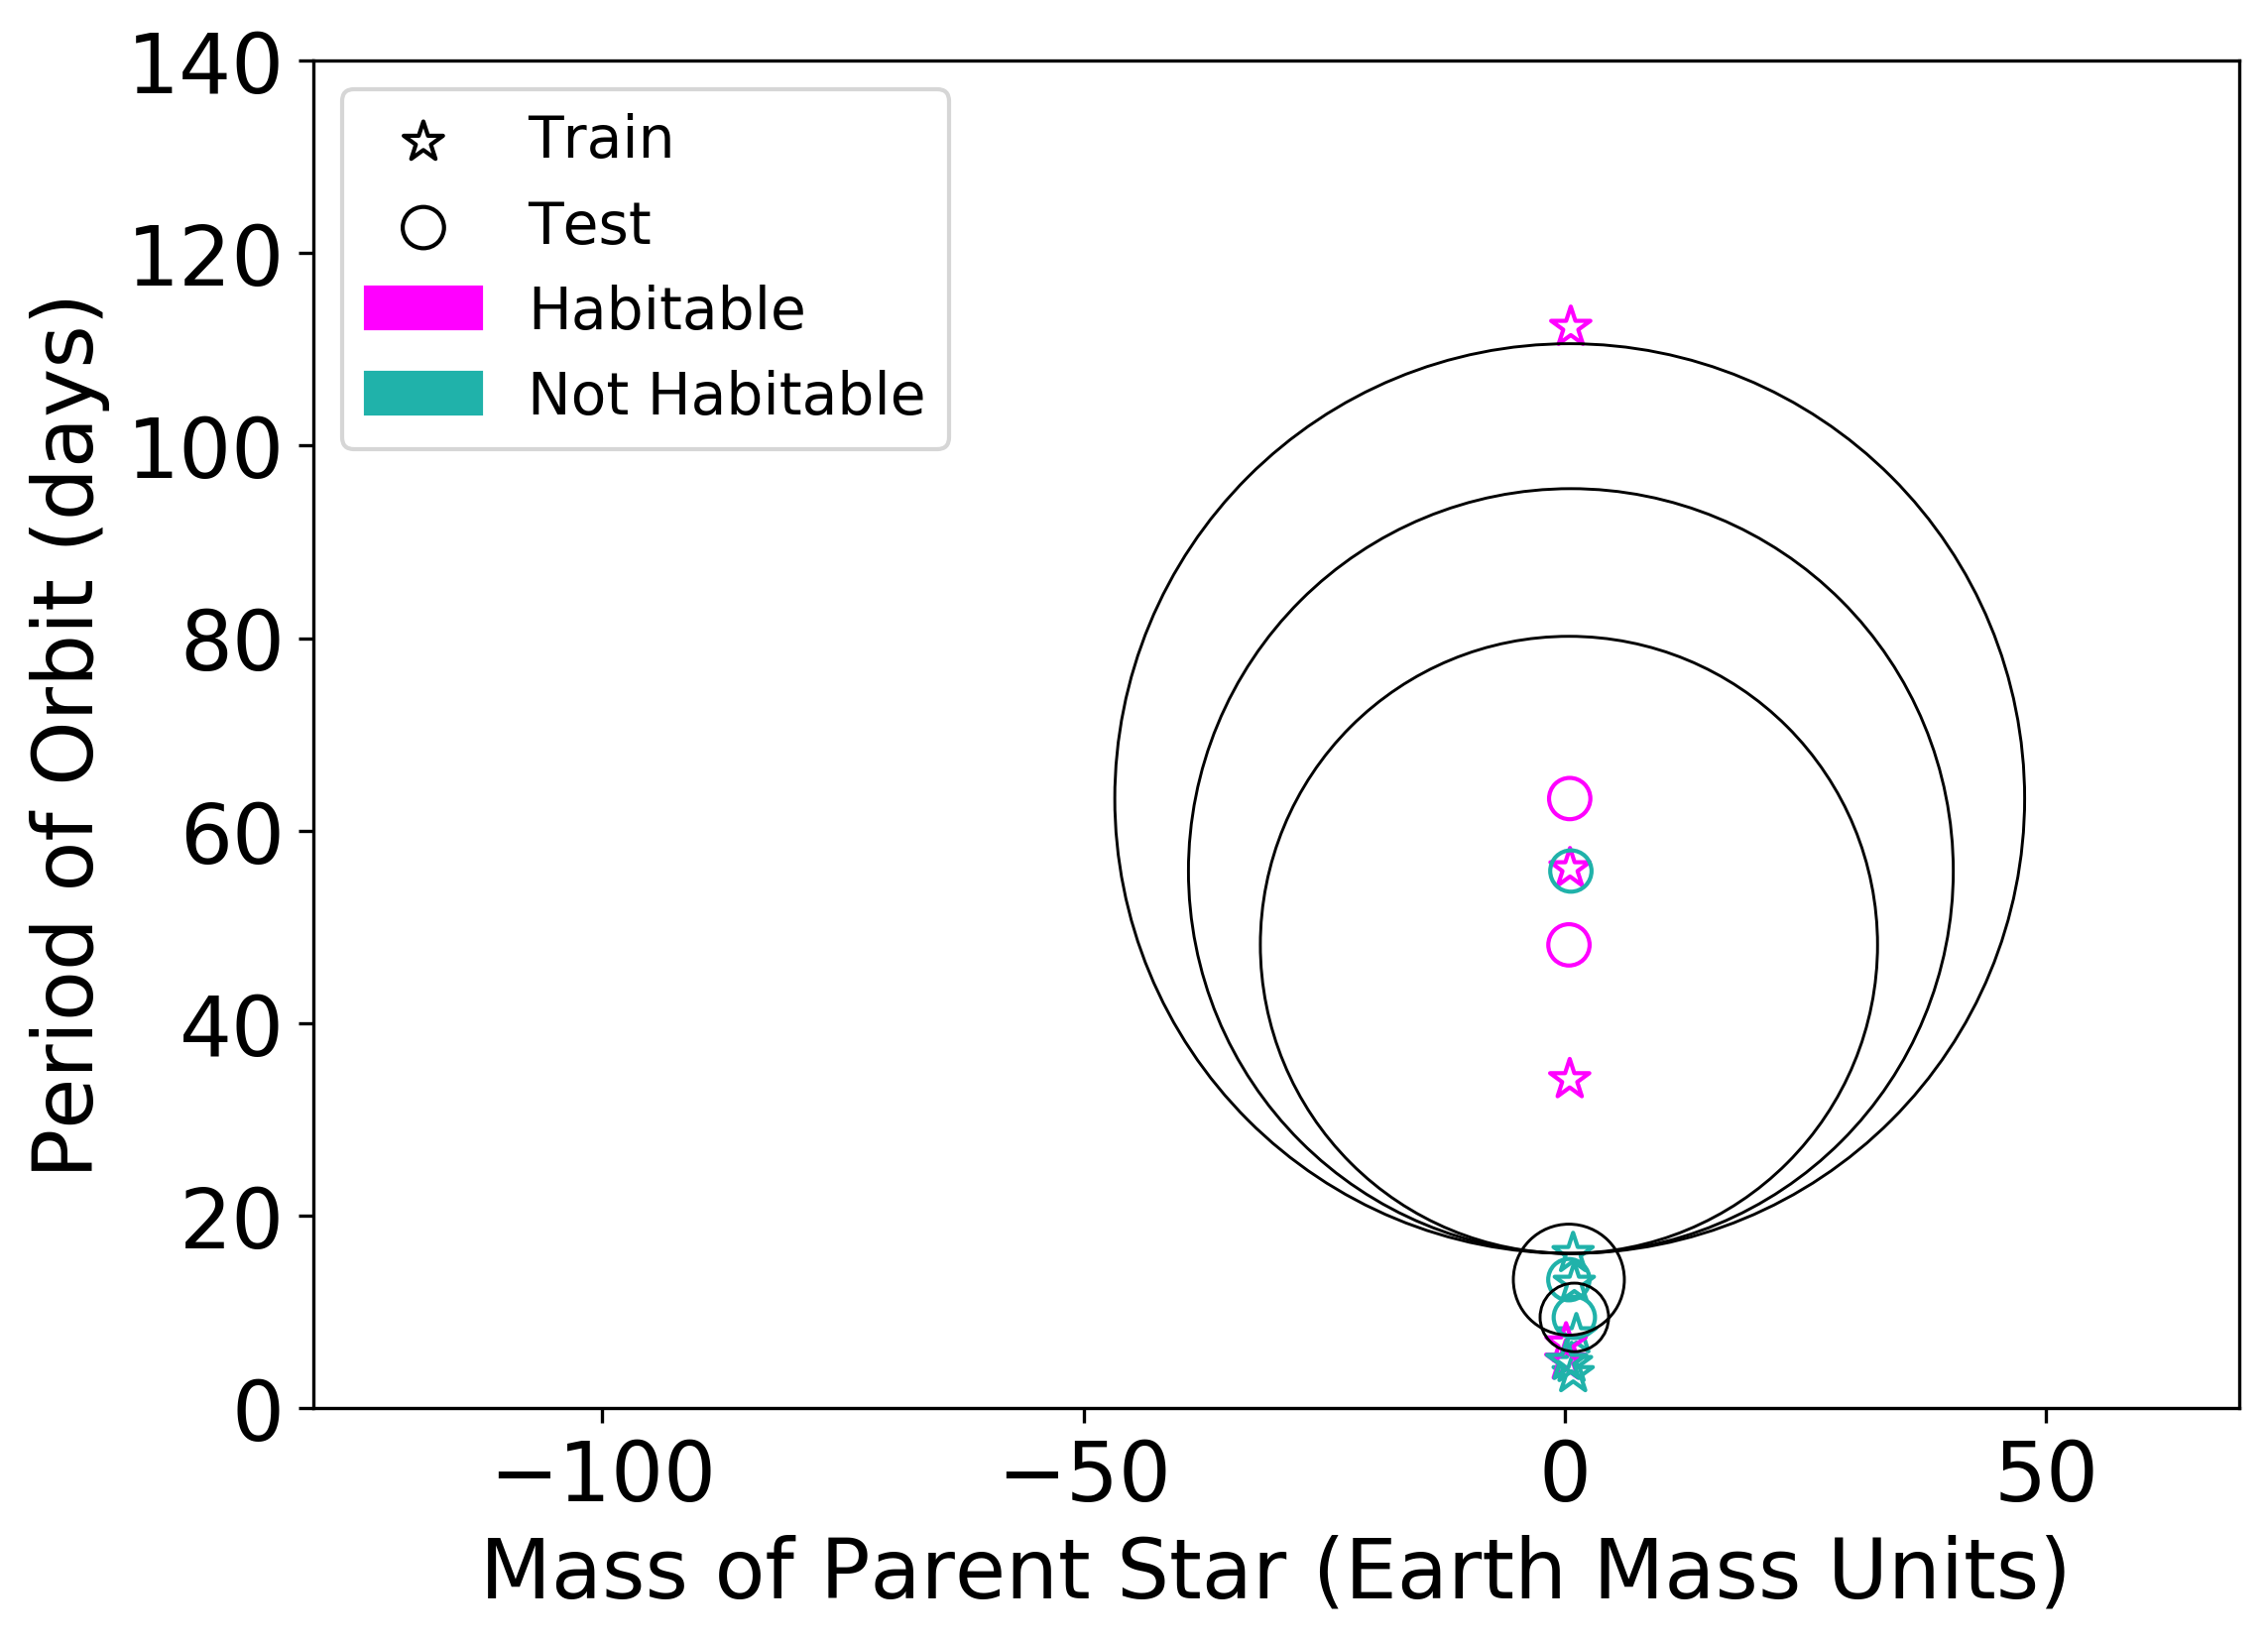

In [17]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',facecolor = 'none',\
            c = TrainSet['P_HABITABLE'], s = 100, label = 'Train', cmap=cmap) 

a.set_facecolor('none')

a = plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',facecolors = 'none',\
            c = TestSet['P_HABITABLE'], s = 100, label = 'Test', cmap=cmap) 

a.set_facecolor('none')

for i in range(len(TestSet)): #plot neighbors

    circle1=plt.Circle((TestSet['S_MASS'].iloc[i],TestSet['P_PERIOD'].iloc[i]),model.kneighbors(Xtest.iloc[:,:2])[0][i,2],\
                       lw = 0.7, edgecolor='k',facecolor='none')
    plt.gca().add_artist(circle1)
    
plt.gca().set_aspect(1)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14)

plt.xlim(-130,70)
plt.ylim(0,140)
plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');

#plt.savefig('HabPlanetsKNN2features.png', dpi = 300)

### Excercise 3

Issue: There is one direction that dominates the distances of the clusters. Can you see which one?
How would you fix this issue? 

*student work here*

## Scaling or whiting data

To make both feature axes the same size, one needs to renormalize both to a common scale (min and max values are the same). Fortunately, this is a built-in function in scikit-learn.

In [42]:
# This can be solved by scaling.

scaler = sklearn.preprocessing.RobustScaler()

In [51]:
# rescale the training set
scaler.fit(Xtrain)

RobustScaler()

In [52]:
scaledXTrain = scaler.transform(Xtrain)

In [53]:
scaledXTrain

array([[ 0.47222222, -0.18360363, -0.33840183],
       [ 0.44444444,  0.06038761,  0.05671512],
       [ 1.38888889, -0.10467304, -0.14339694],
       [-0.22222222,  1.94175736,  1.60417741],
       [ 0.80555556,  0.        ,  0.        ],
       [-1.66666667, -0.15801948, -0.43679409],
       [ 0.        , -0.16299717, -0.31519247],
       [-1.58333333, -0.12323674, -0.38472405],
       [ 1.19444444, 21.311672  , 11.01745224],
       [ 0.33333333,  3.04655169,  2.38937206],
       [-0.52777778,  0.41352236,  0.3761471 ],
       [-0.44444444,  0.84198052,  0.66159817],
       [-1.41666667, -0.15877753, -0.40201197]])

In [54]:
# rescale the test data
scaledXtest = scaler.transform(Xtest) #These are now numpy arrays, not data frames

In [55]:
# fit the model to the training set and predict the test data, all in one line:
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])

array([1, 0, 1, 0, 1])

In [56]:
model.kneighbors(scaledXtest[:,:2]) #The distances look more balanced

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]),
 array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]]))

### Redrawing the circles on the scaled data

Now we redraw the circles for classification again but on the scaled data.

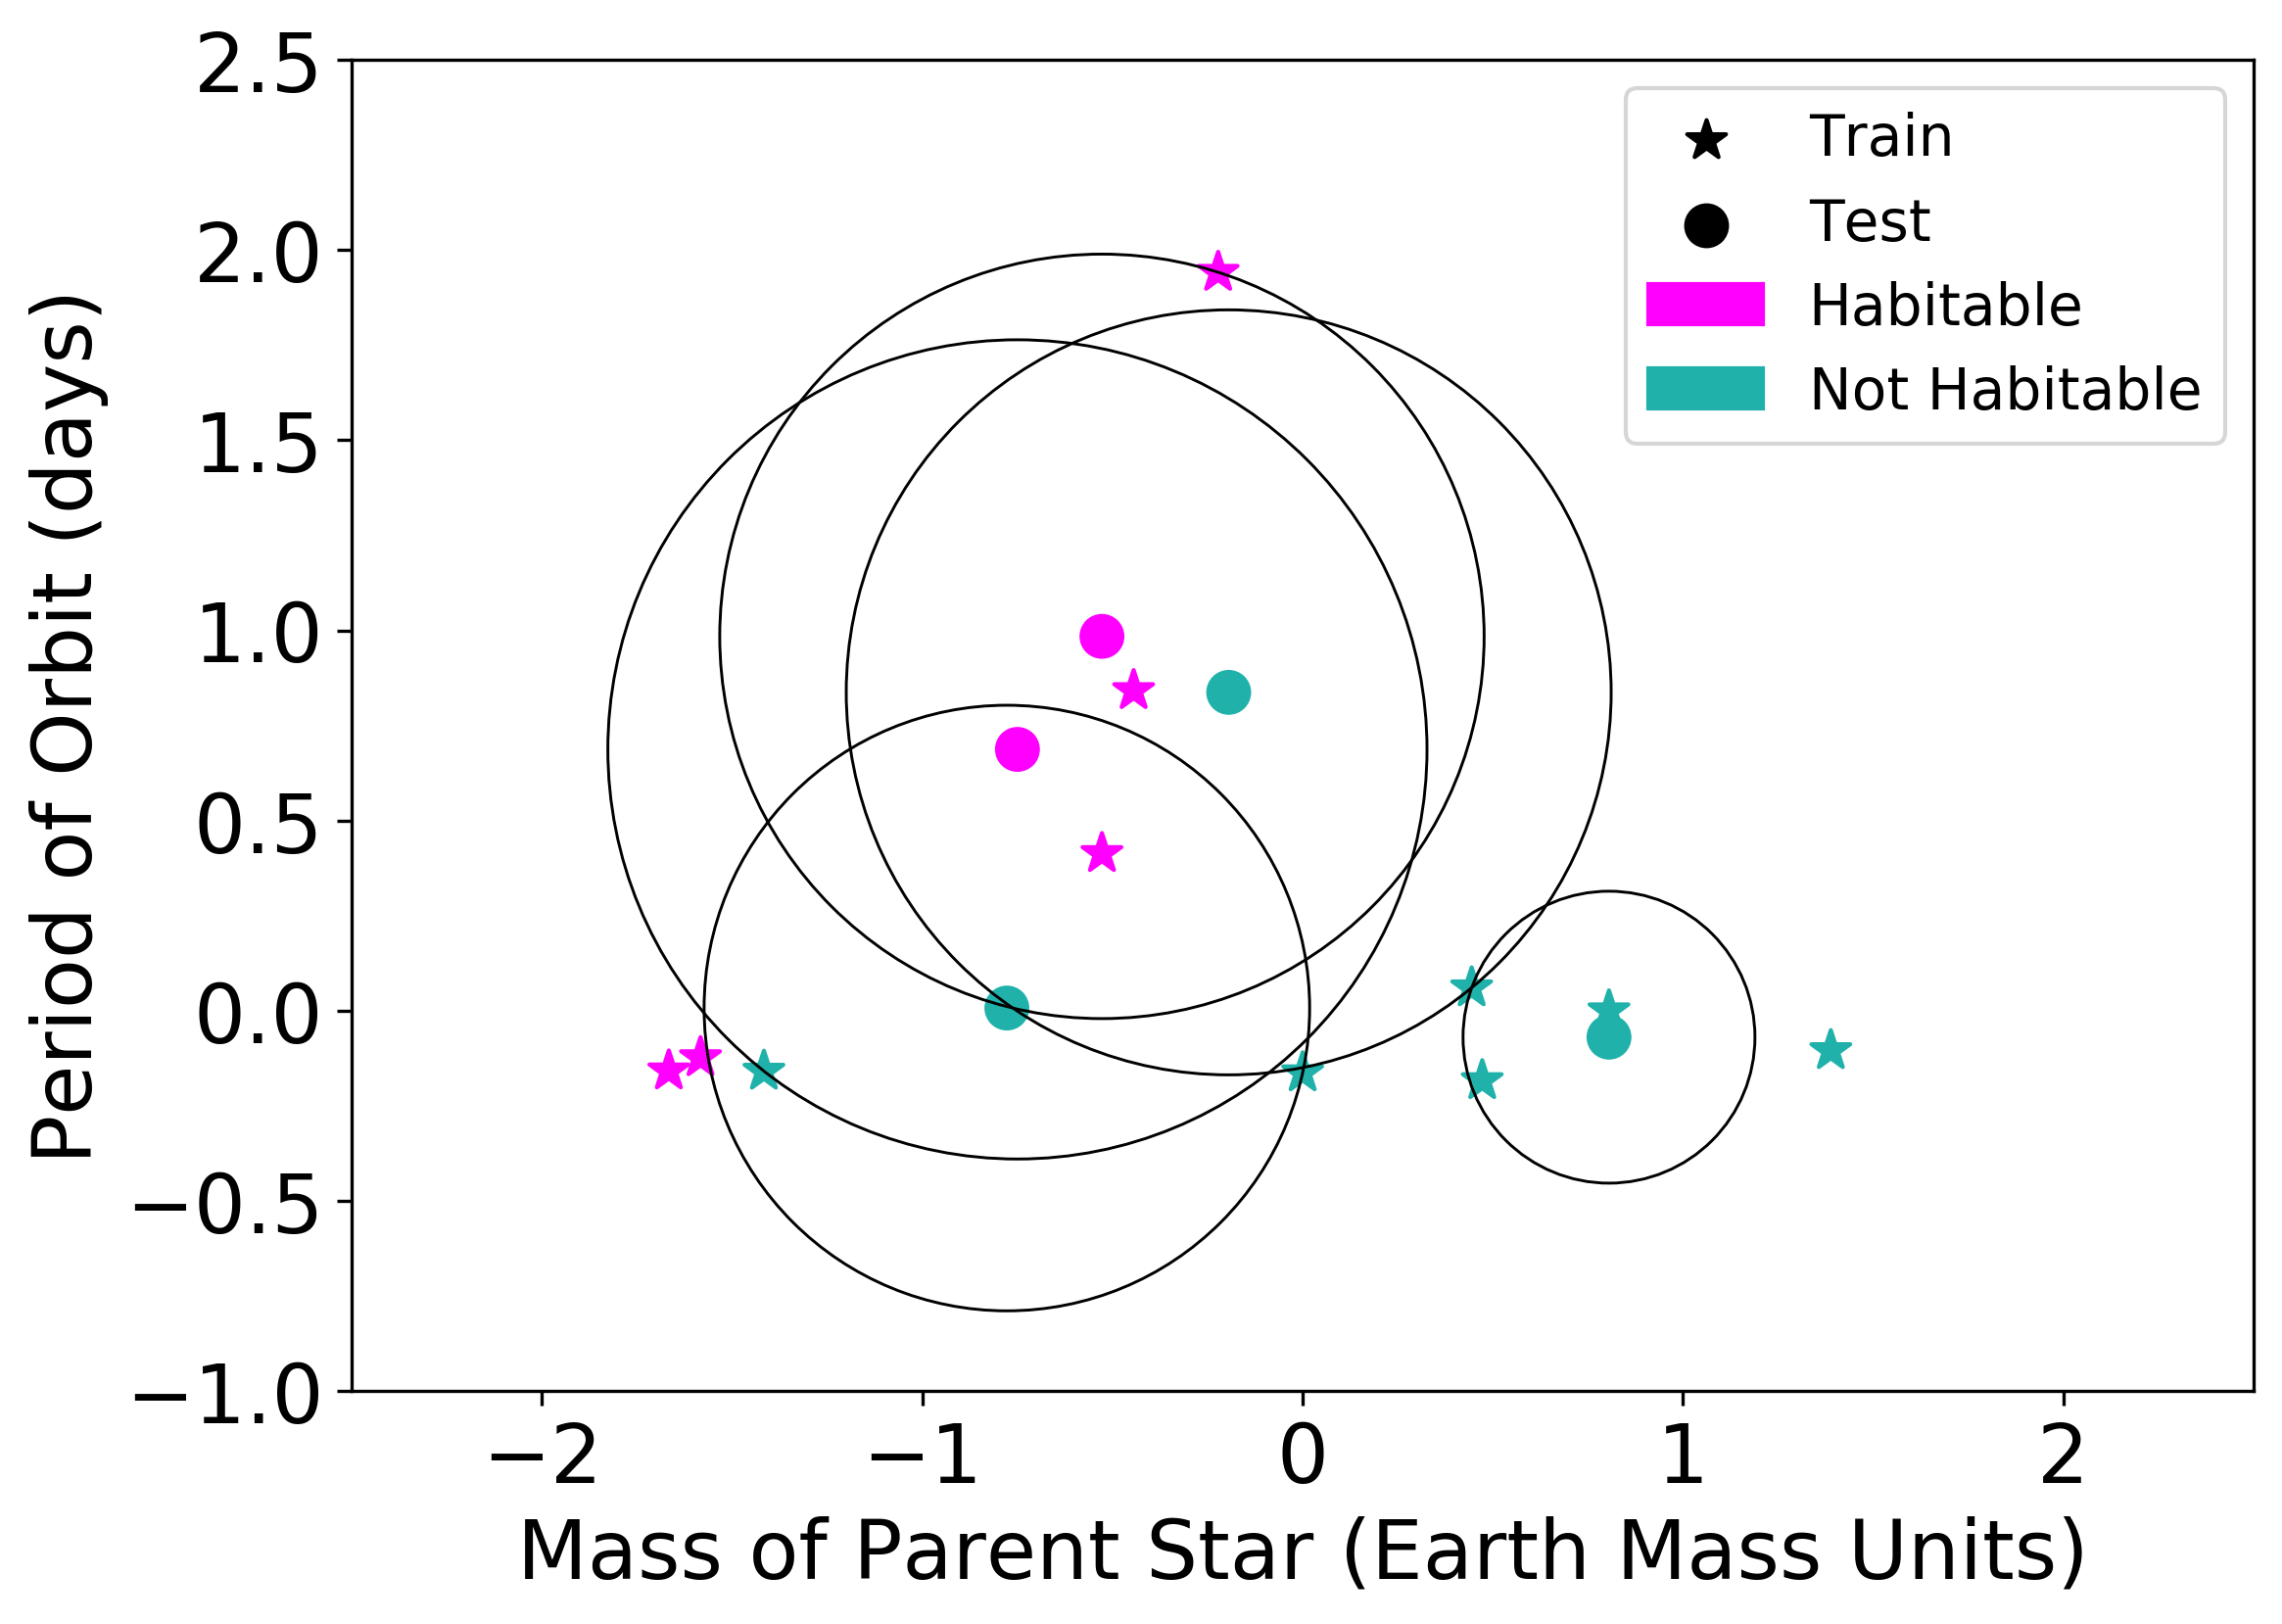

In [57]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper right', fontsize = 14)

plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

#plt.legend(loc = 'upper left', fontsize = 16);

#plt.savefig('HabPlanetsKNNscaled.png', dpi = 300)

### Excercise 4

Has re-scaling the data solved the problem? How good are these classifications? 

*student work here*